In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv(r"/content/movies_recc.csv", encoding='unicode_escape')

In [ ]:
df.head()

,ID,Movie,Genres,Reviews,Rating,Year
0,1,Spider-Man: No Way Home,Action/Adventure,This is by far the best Spider-Man or even Mar...,9.5,2021
1,2,Malignant,Thriller/Drama,This movie was SO BRILLIANT. I could NOT get o...,9.4,2021
2,3,Red Notice,Action/Comedy,I just wanna let you guys know that this movie...,9.5,2021
3,4,Tenet,Action/Sci-fi,Nolanâs works are always thought provoking a...,9.0,2020
4,5,The Mummy,Action/Horror,One of me and my sister's favorite actors to w...,9.2,2017


In [ ]:
ex = df['Reviews'][10]
print(ex)

It was pretty bad...sure there are some long dialogs but without them many viewers would've been even more confused than what they already are...probably the same whom gave this movie pretty bad reviews calling it boring woth not enough fight scenes and calling it the worst of the franchise ðð we didn't enjoy it and to see all the easter eggs and get the whole story that I might have missed while getting my cup of coffee or a new bag of popcorn..I was glad for the movie to get over.<br><br>It was awful! please do not watch this film<br><br> Would rather have watched something else..Disgusting and time waste.. the plot didn't even make any sense!


In [ ]:
example = df['Reviews'][0]
print(example)

This is by far the best Spider-Man or even Marvel movie, the amount of mood swings it had just kept you invested in the movie the entire time. The fact that Tobey and Andrew came back and brought their old characters back to life is just amazing. I honestly canât even think of a reason to dislike this movie in anyway. I do want to talk about the end though, that was the one of the saddest if not the saddest ending in the MCU (EndGame is a close 2nd) when you think about it Peter had only been dating MJ for a good 2-3 days since it relays from FFH into NWH and how they both love each other but now have been turned back into strangers is heartbreaking, also seeing Ned walk past Peter without saying hi or anything like that is soo sad. I canât wait for this to come out on DVD, Iâve already pre ordered it on Movies Anywhere.<br>Coming from someone who doesnât like the previous two mcu spider-man movies this is by far the best live action spider-man movie ever. I went in to that cin

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
from nltk.tokenize import word_tokenize
tokens = nltk.word_tokenize(example)
tokens[:10]

['This',
 'is',
 'by',
 'far',
 'the',
 'best',
 'Spider-Man',
 'or',
 'even',
 'Marvel']

In [ ]:
from nltk.tokenize import word_tokenize
tok = nltk.word_tokenize(ex)
tok[:10]

['It', 'was', 'pretty', 'bad', '...', 'sure', 'there', 'are', 'some', 'long']

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('is', 'VBZ'),
 ('by', 'IN'),
 ('far', 'RB'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('Spider-Man', 'NN'),
 ('or', 'CC'),
 ('even', 'RB'),
 ('Marvel', 'NNP')]

In [ ]:
tagged = nltk.pos_tag(tok)
tagged[:10]

[('It', 'PRP'),
 ('was', 'VBD'),
 ('pretty', 'RB'),
 ('bad', 'JJ'),
 ('...', ':'),
 ('sure', 'NN'),
 ('there', 'EX'),
 ('are', 'VBP'),
 ('some', 'DT'),
 ('long', 'JJ')]

In [ ]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
from nltk.sentiment import SentimentAnalyzer
from tqdm.notebook import tqdm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [ ]:
ss = sid.polarity_scores(example)
print (ss)

{'neg': 0.086, 'neu': 0.712, 'pos': 0.203, 'compound': 1.0}


In [ ]:
sa = sid.polarity_scores(ex)
print (sa)

{'neg': 0.209, 'neu': 0.683, 'pos': 0.108, 'compound': -0.9527}


In [ ]:
from sklearn.metrics import accuracy_score
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

predicted_sentiments = []

for text in df['Reviews']:
    sentiment = analyzer.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        predicted_sentiments.append('positive')
    elif sentiment['compound'] <= -0.05:
        predicted_sentiments.append('negative')
    else:
        predicted_sentiments.append('neutral')

actual_sentiments = df['actual_sentiment_column']

accuracy = accuracy_score(actual_sentiments, predicted_sentiments)
print(f'Accuracy: {accuracy:.2f}')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


KeyError: ignored

In [ ]:
import collections
from collections import defaultdict
movie_sentiments = defaultdict(list)

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    review = row['Reviews']
    myid = row['ID']
    movie_title = row['Movie']
    res[myid] = sid.polarity_scores(review)

    sentiment = sid.polarity_scores(review)['compound']
    movie_sentiments[movie_title].append(sentiment)


  0%|          | 0/154 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index': 'ID'})
vaders = vaders.merge(df, how = 'left')
vaders.head()

,ID,neg,neu,pos,compound,Movie,Genres,Reviews,Rating,Year
0,1,0.086,0.712,0.203,1.0000,Spider-Man: No Way Home,Action/Adventure,This is by far the best Spider-Man or even Mar...,9.5,2021
1,2,0.137,0.677,0.186,0.9995,Malignant,Thriller/Drama,This movie was SO BRILLIANT. I could NOT get o...,9.4,2021
2,3,0.088,0.681,0.231,1.0000,Red Notice,Action/Comedy,I just wanna let you guys know that this movie...,9.5,2021
3,4,0.091,0.743,0.166,0.9569,Tenet,Action/Sci-fi,Nolanâs works are always thought provoking a...,9.0,2020
4,5,0.015,0.790,0.195,0.9838,The Mummy,Action/Horror,One of me and my sister's favorite actors to w...,9.2,2017


In [ ]:
vaders=vaders.drop(['Year'], axis=1)

In [ ]:
vaders.head()

,ID,neg,neu,pos,compound,Movie,Genres,Reviews,Rating
0,1,0.086,0.712,0.203,1.0000,Spider-Man: No Way Home,Action/Adventure,This is by far the best Spider-Man or even Mar...,9.5
1,2,0.137,0.677,0.186,0.9995,Malignant,Thriller/Drama,This movie was SO BRILLIANT. I could NOT get o...,9.4
2,3,0.088,0.681,0.231,1.0000,Red Notice,Action/Comedy,I just wanna let you guys know that this movie...,9.5
3,4,0.091,0.743,0.166,0.9569,Tenet,Action/Sci-fi,Nolanâs works are always thought provoking a...,9.0
4,5,0.015,0.790,0.195,0.9838,The Mummy,Action/Horror,One of me and my sister's favorite actors to w...,9.2


<ipython-input-21-62f1b8e84a68>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=vaders, x='Rating_grouped', y='compound', ci=None)


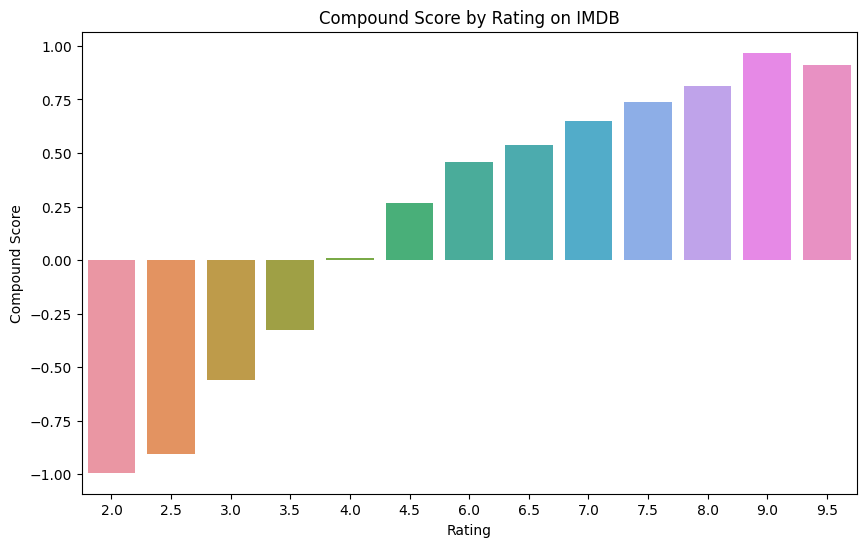

In [ ]:
# Group the ratings by increments of 0.5
vaders['Rating_grouped'] = (vaders['Rating'] * 2).round() / 2

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=vaders, x='Rating_grouped', y='compound', ci=None)

# Set the labels and title
ax.set(xlabel='Rating', ylabel='Compound Score')
plt.title('Compound Score by Rating on IMDB')

# Show the plot
plt.show()

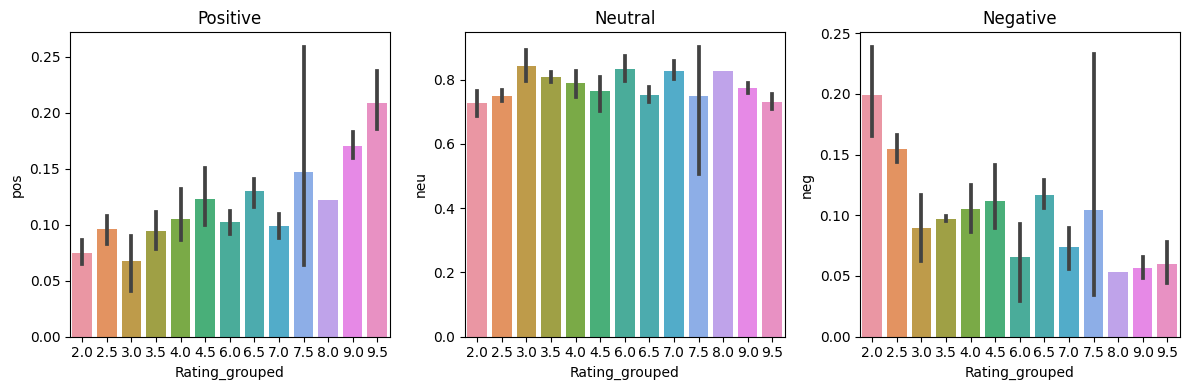

In [ ]:
# Group the ratings by increments of 0.5
vaders['Rating_grouped'] = (vaders['Rating'] * 2).round() / 2

# Create subplots for positive, neutral, and negative sentiments
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Create bar plots for each sentiment
sns.barplot(data=vaders, x='Rating_grouped', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating_grouped', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating_grouped', y='neg', ax=axs[2])

# Set titles for each subplot
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

# Show the subplots
plt.tight_layout()
plt.show()

In [ ]:
user_genre = input("Enter the genre you want a recommendation for: ").strip().lower()

# filter movies by the user's preferred genre and positive sentiment (comps > 0)
filtered_movies = vaders[(vaders['Genres'].str.lower().str.contains(user_genre)) & (vaders['compound'] > 0)]

# sorting in descending order
filtered_movies = filtered_movies.sort_values(by='compound', ascending=False)

# recommend
if filtered_movies.empty:
    print(f"No movies found in the {user_genre.capitalize()} genre with positive sentiment.")
else:
    print(f"Top 3 Recommended {user_genre.capitalize()} Movies with Positive Sentiment:")
    for i, row in filtered_movies.head(3).iterrows():
        print(f"{i+1}. Movie: {row['Movie']}, Compound Sentiment: {row['compound']:.2f}")

Enter the genre you want a recommendation for: drama
Top 3 Recommended Drama Movies with Positive Sentiment:
2. Movie: Malignant, Compound Sentiment: 1.00
124. Movie: Committed, Compound Sentiment: 1.00
18. Movie: Snowden, Compound Sentiment: 1.00
